In [1]:
from __future__ import print_function
import pylab as pl
from scipy.optimize import curve_fit, minimize
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.

For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).

Describe the behavior you see in the plots in terms of the law of large numbers.

PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing

## Choose which distributions to use and set the seed

In [2]:
# Choose a mean for all distributions:
mymean = 30

np.random.seed(123)

In [4]:
# the array of sizes, for all distributions:
size = (np.linspace(10, np.sqrt(2000), 100)**2).astype(int)
print (size, size.shape)

[ 100  107  114  122  130  138  146  155  163  173  182  192  201  211  222
  232  243  254  266  277  289  301  313  326  339  352  365  379  392  406
  421  435  450  465  480  496  511  527  544  560  577  594  611  629  646
  664  682  701  720  739  758  777  797  817  837  857  878  899  920  942
  963  985 1007 1030 1052 1075 1098 1122 1145 1169 1193 1218 1242 1267 1292
 1317 1343 1369 1395 1421 1448 1475 1502 1529 1557 1584 1612 1641 1669 1698
 1727 1756 1786 1816 1846 1876 1906 1937 1968 2000] (100,)


In [5]:
md = {}
collective = []

In [6]:
# Naming distribution types
norm_dist = ['norm']
chisq_dist = ['chisquare']
pois_dist =['poisson']
binom_dist =['binomial']

## Set up code for histograms

In [21]:
def plotOneDistHistogram(distDic, histTitle):
    '''Function to plot a histogram of a distribution
    Argumens:
        distDic: dictionary containing N a distribution 
        histTitle: title of the histogram plot
    '''
    allmeans = list(distDic['means'].values())

    pl.figure(figsize=(10, 10))
    pl.hist(allmeans, bins=30, normed=True)
    pl.plot([mymean, mymean], pl.ylim(), 'k-')
    pl.xlabel('sample mean', fontsize = 18)
    pl.ylabel('Frequency of sample mean', fontsize = 18)
    pl.title(histTitle, fontsize=20)

# Chi-Square

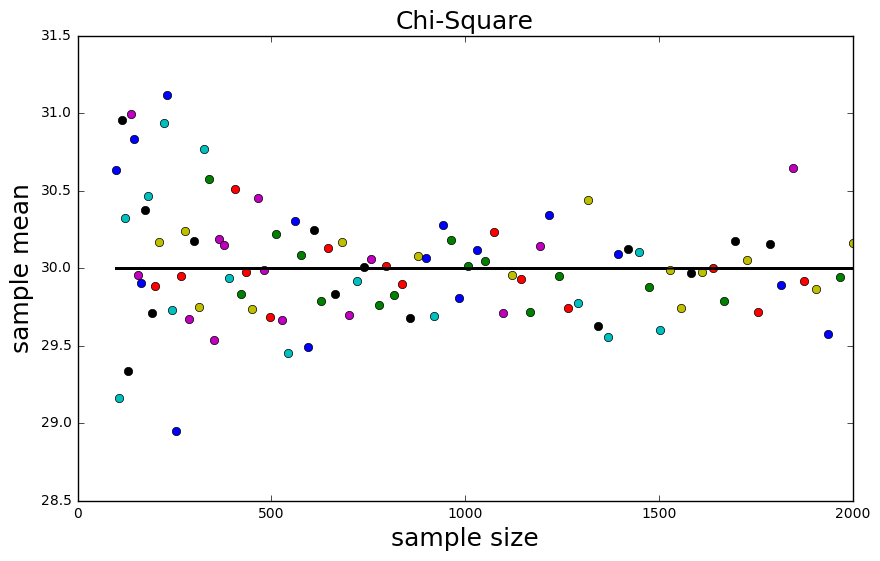

In [7]:
df = mymean

md['chisquare'] = {} 

for n in size:
    md['chisquare'][n] = np.random.chisquare(df, size = n)

md['chisquare']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisquare']:
    if not type(nn) == str:
        md['chisquare']['means'][nn] = md['chisquare'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisquare']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi-Square', fontsize=18)
        axchisq_mu_n.plot([min(size), max(size)], [df, df], 'k')
        collective.append(md['chisquare']['means'][nn])

### Figure 1: 

The distribution of means of the sample is plotted against the size of the sample. The distribution of means narrows toward the true mean of the population, which is marked by a black horizontal line, as N increases

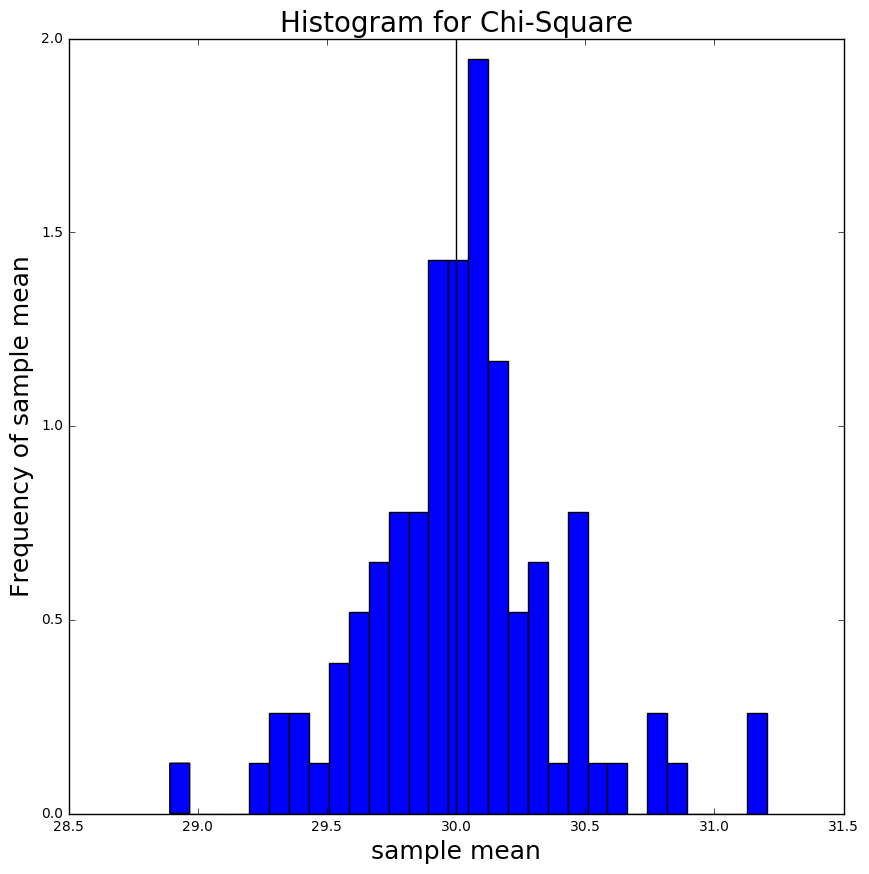

In [25]:
plotOneDistHistogram(md['chisquare'], 'Histogram for Chi-Square')

### Figure 2: 

Chi-square(degrees of freedom). The mean of all 100 samples is bell shaped, according to the expectation that it would be Gaussian distributed, and peaks near 30, according to the expectation that the mean of the distribution of means is equal to the mean of the population, indicated by a vertical black line (the mean of model from which we generate all distributions in this case)

In [ ]:
     axchisq_mu_n.plot(nn, md['chisquare']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi-Square', fontsize=18)
        axchisq_mu_n.plot([min(size), max(size)], [df, df], 'k')
        collective.append(md['chisquare']['means'][nn])

# Normal

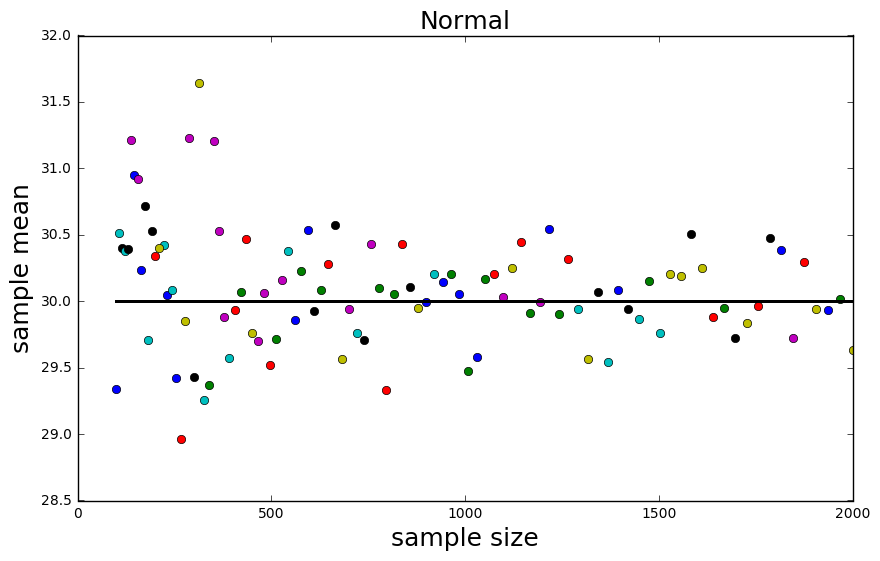

In [8]:
md['norm'] = {} 

for n in size:
    md['norm'][n] = np.random.normal(loc=mymean, scale=10, size = n)

md['norm']['means'] = {}
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['norm']:
    if not type(nn) == str:
        md['norm']['means'][nn] = md['norm'][nn].mean()
        axnorm_mu_n.plot(nn, md['norm']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axnorm_mu_n.set_title('Normal', fontsize=18)
        axnorm_mu_n.plot([min(size), max(size)], [mymean, mymean], 'k')
        collective.append(md['norm']['means'][nn])

### Figure 3: 

The distribution of means of the sample narrows toward the true mean of the population as N increases.

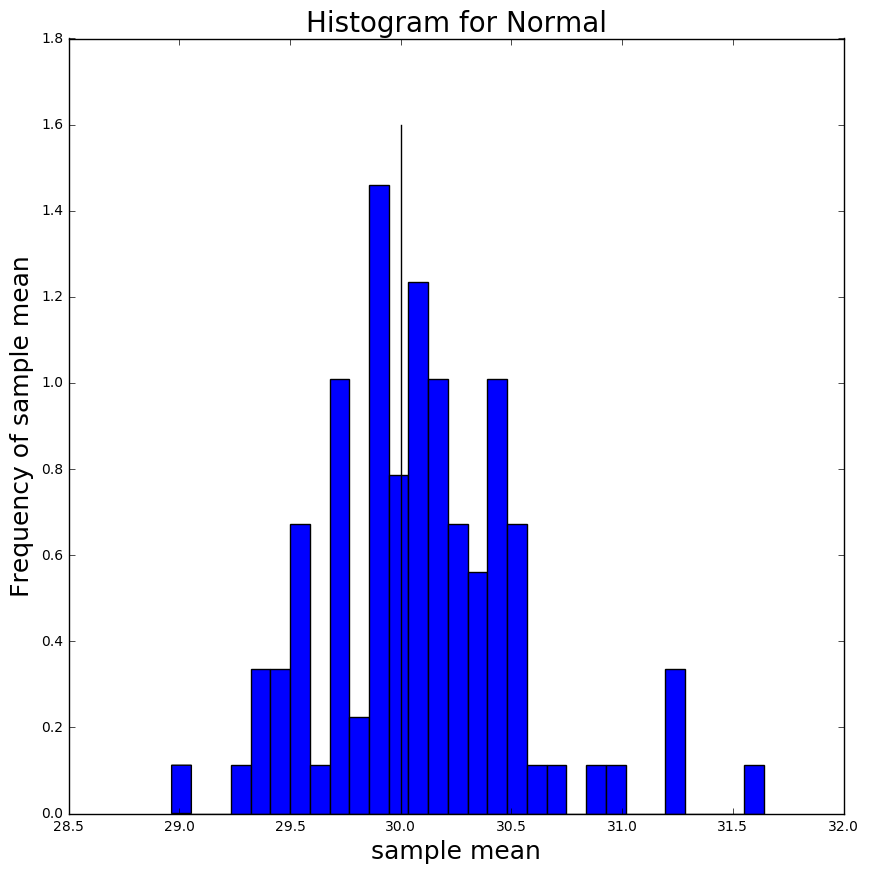

In [26]:
plotOneDistHistogram(md['norm'], 'Histogram for Normal')

### Figure 4: 

Normal (mu, sigma). The mean of all 100 samples is bell shaped, according to the expectation that it would be Gaussian distributed, and peaks near 30, according to the expectation that the mean of the distribution of means is equal to the mean of the population.

# Poisson

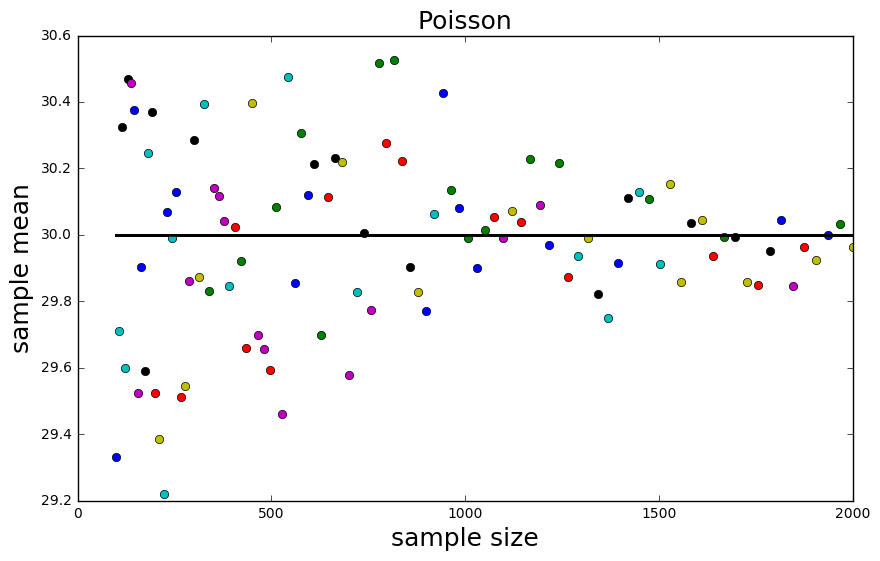

In [9]:
md['poisson'] = {} 

for n in size:
    md['poisson'][n] = np.random.poisson(lam = mymean, size = n)

md['poisson']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        axpoisson_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=18)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=18)
        axpoisson_mu_n.set_title('Poisson', fontsize=18)
        axpoisson_mu_n.plot([min(size), max(size)], [mymean, mymean], 'k')
        collective.append(md['poisson']['means'][nn])

### Figure 5: 

The distribution of means of the sample narrows toward the true mean of the population as N increases

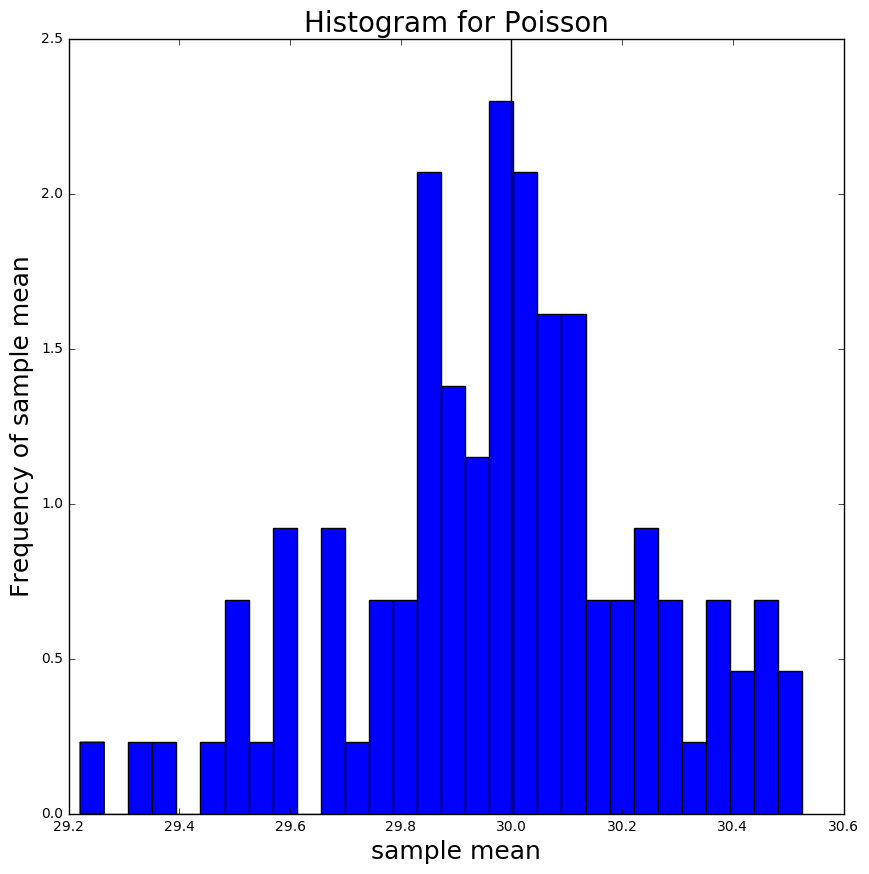

In [27]:
plotOneDistHistogram(md['poisson'], 'Histogram for Poisson')

### Figure 6: 

Poisson(lambda). The mean of all 100 samples is bell shaped, according to the expectation that it would be Gaussian distributed, and peaks near 30, according to the expectation that the mean of the distribution of means is equal to the mean of the population.

# Binomial

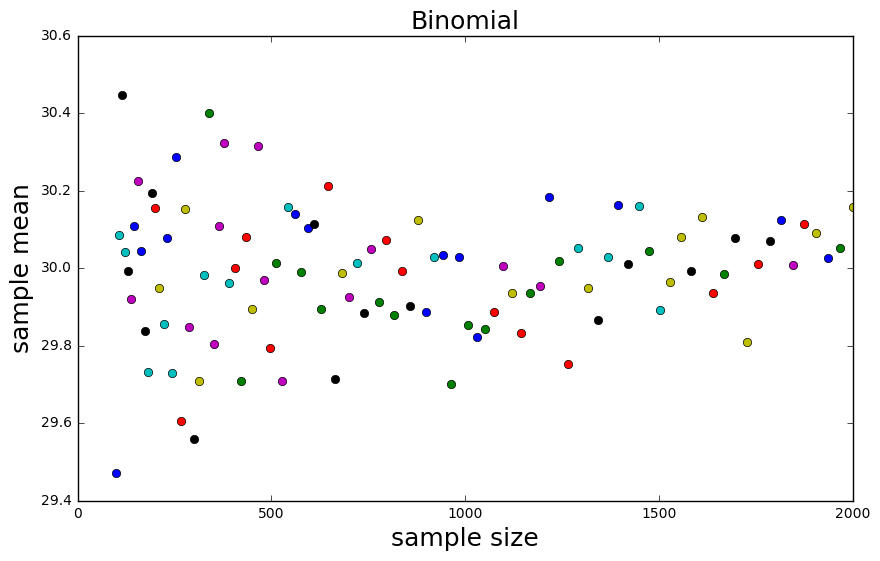

In [10]:
md['binomial'] = {} 

binom_p = 0.5   # probability
binom_n = mymean / binom_p  # n = mean/probability

for n in size:
    md['binomial'][n] = np.random.binomial(binom_n, binom_p, size = n)

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        #axbinomial_mu_n.plot([min(binom_n), min(binom_n)], [mymean, mymean], 'k')
        collective.append(md['binomial']['means'][nn])

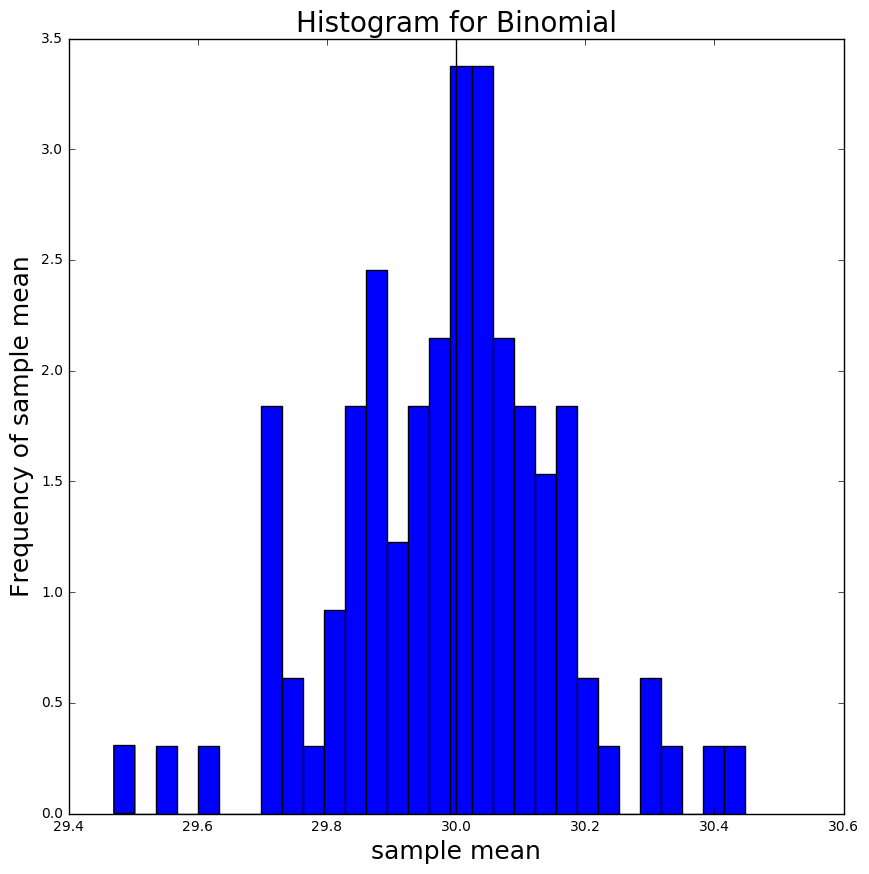

In [28]:
plotOneDistHistogram(md['binomial'], 'Histogram for Binomial')

# ALL MEANS

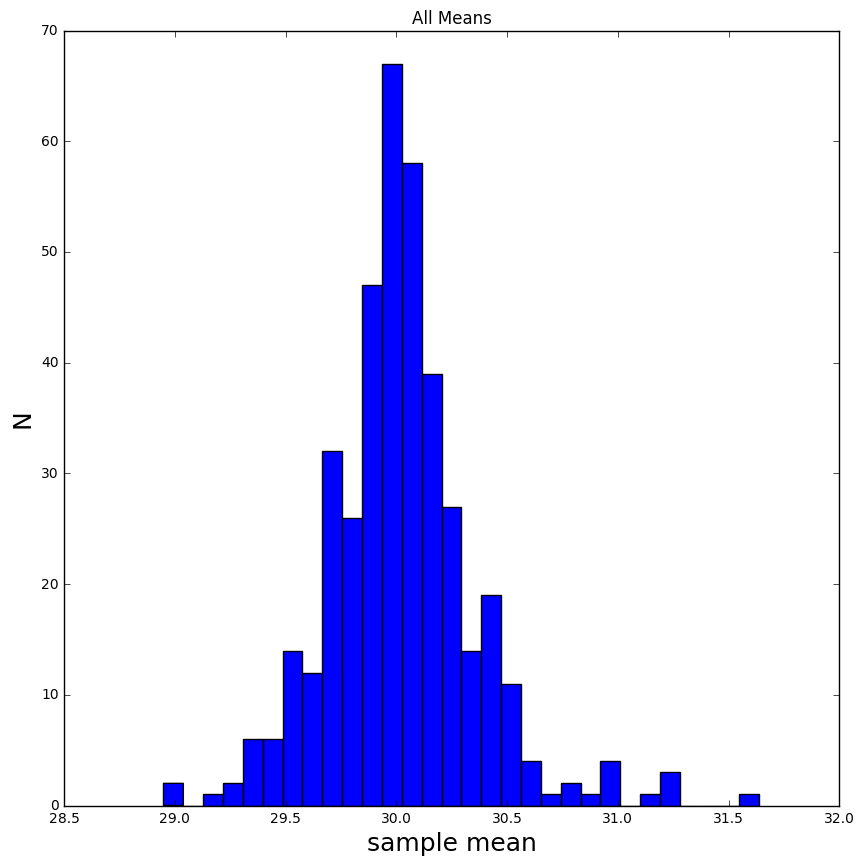

In [13]:
pl.figure(figsize = (10, 10))
pl.hist(collective, bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('All Means')
#print(collective)

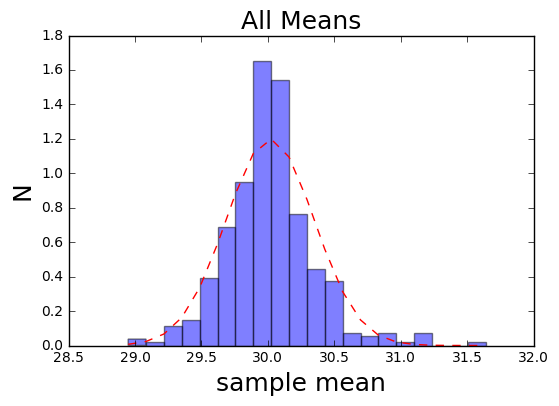

In [14]:
mu = numpy.mean(collective)
sigma = numpy.std(collective)
x = collective
 
num_bins = 20

n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)
 
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('All Means', fontsize = 18)